# Práctica de deep learning utilizando la base de datos de Airbnb

Juan David Pardo P.

# 0. Importarcion de librerias

In [79]:
pip install -U scikit-learn

In [197]:
import pandas as pd
# para mostrar todas las filas
pd.set_option('display.max_rows', None)
# para mostrar todas las columnas
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import cv2
import imageio.v3 as io

#Librerías carga de imágenes
from tqdm import tqdm
from typing import Optional, Union


#Matplolib Settings
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

#División datos test y entrenamiento
from sklearn.model_selection import train_test_split

#Estadarización/Normalización
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Tensorflow Keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2
import tensorflow_hub as hub

#Combinación tipos de datos
from sklearn.svm import SVC

# 1. Descarga y preprocesado de los datos

Descargar los datos, almacenar las imágenes y eliminar filas del CSV para los cuales no se haya descargado la imagen.

In [198]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2024-03-03 22:27:43--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [           <=>      ]  52.85M  21.5MB/s    in 2.5s    

2024-03-03 22:27:46 (21.5 MB/s) - ‘airbnb-listings.csv’ saved [55414009]



In [199]:
# Validamos la descarga del dataset
!ls -lah

total 84M
drwxr-xr-x 1 root root 4.0K Mar  3 14:33 .
drwxr-xr-x 1 root root 4.0K Mar  3 14:23 ..
-rw-r--r-- 1 root root  53M Mar  3 22:27 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Feb 28 14:26 .config
drwx------ 5 root root 4.0K Mar  3 14:27 drive
-rw-r--r-- 1 root root 720K Mar  3 22:15 filtered_data.csv
-rw-r--r-- 1 root root  22M Mar  3 22:15 images_airbnb.npy
-rw-r--r-- 1 root root  99K Mar  3 21:48 model.png
drwxr-xr-x 1 root root 4.0K Feb 28 14:27 sample_data
-rw-r--r-- 1 root root  38K Mar  3 22:24 test_airbnb.csv
-rw-r--r-- 1 root root 1.2M Mar  3 22:24 test_images_airbnb.npy
-rw-r--r-- 1 root root 176K Mar  3 22:24 train_airbnb.csv
-rw-r--r-- 1 root root 5.3M Mar  3 22:24 train_images_airbnb.npy
-rw-r--r-- 1 root root  38K Mar  3 22:24 valid_airbnb.csv
-rw-r--r-- 1 root root 1.2M Mar  3 22:24 valid_images_airbnb.npy


In [200]:
#Leemos los datos y quitamos precios nulos
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(3).T

,0,1,2
ID,17823671,17309526,801113
Listing Url,https://www.airbnb.com/rooms/17823671,https://www.airbnb.com/rooms/17309526,https://www.airbnb.com/rooms/801113
Scrape ID,20170407214119,20170407214050,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08
Name,Room in beautiful flat in Madrid centre!! SC8_1_2,Double room in Gracia/Whole Apartment,DOUBLE ROOM WITH PRIVATE BATHROOM IN LA LATINA
Summary,Great room with large bed and two windows,Double room in Gracia - Habitación doble en Gr...,Bright and spacious double room and bathroom f...
Space,Amazing 12 bedroom flat with 3 complete bathro...,NaN,Spacious double room with private bathroom and...
Description,Great room with large bed and two windows Amaz...,Double room in Gracia - Habitación doble en Gr...,Bright and spacious double room and bathroom f...
Experiences Offered,none,none,none
Neighborhood Overview,"The "" Barrio de las Letras "" is one of the mos...",NaN,".Safety neighborhood with all the amenities, g..."


Se valida el tipo de datos con el que trabajara en dataset.

In [201]:
import pandas as pd

# Obtiene el valor actual del número máximo de filas
max_rows = pd.get_option('display.max_rows')

# Imprime el valor actual del número máximo de filas
print(f'Número máximo de filas: {max_rows}')

# Suponiendo que airbnb_df es tu DataFrame
# Puedes usar set_option para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Muestra los tipos de datos de todas las columnas
data.info()

Número máximo de filas: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14001 entries, 0 to 14000
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14001 non-null  int64  
 1   Listing Url                     14001 non-null  object 
 2   Scrape ID                       14001 non-null  int64  
 3   Last Scraped                    14001 non-null  object 
 4   Name                            14001 non-null  object 
 5   Summary                         13451 non-null  object 
 6   Space                           10306 non-null  object 
 7   Description                     13995 non-null  object 
 8   Experiences Offered             14001 non-null  object 
 9   Neighborhood Overview           8630 non-null   object 
 10  Notes                           5288 non-null   object 
 11  Transit                         8552 non-null   object 
 12  Acc

In [202]:
# Validando el numero de columnas y filas del dataset
data.shape

(14001, 89)

# Se llevará a cabo una limpieza preliminar antes de procesar los datos.



Se encontró que la gran mayoría de los datos se encuentran distribuidos en España

In [203]:
countries = data['Country'].value_counts()
print(countries)

Spain    14001
Name: Country, dtype: int64


Al llevar a cabo un análisis más exhaustivo de los datos de España, se observó que prácticamente la totalidad de la información se origina en la ciudad de Madrid.

In [204]:
import pandas as pd

# Filtrar solo las filas correspondientes a Spain
spain_data = data[data['Country'] == 'Spain']

# Obtener el número de registros por ciudad en Spain
city_counts = spain_data['City'].value_counts()

# Mostrar la lista de número de registros por ciudad
print("Número de registros de Spain por ciudad:")
print(city_counts)


Número de registros de Spain por ciudad:
Madrid                                 13207
Barcelona                                292
马德里                                       52
Palma                                     49
Alcúdia                                   40
Madrid, Comunidad de Madrid, ES           20
Palma de Mallorca                         16
Inca                                      13
Selva                                     13
Búger                                     11
Pollença                                  10
Deià                                       9
Santa Margalida                            8
madrid                                     8
Sóller                                     7
Campanet                                   6
Manacor                                    6
La Puebla                                  6
Pollensa                                   6
Valldemossa                                6
Sant Llorenç des Cardassar                 6
Llucmajor     

Se identificó la necesidad de realizar ajustes en varios registros del conjunto de datos para lograr una normalización completa de todos los registros correspondientes a Madrid

In [205]:
import pandas as pd

# Definir los nombres incorrectos que quieres reemplazar por 'Madrid'
incorrect_names = ['Chueca, Madrid','é©¬å¾·é','las matas  madrid','Comunidad de Madrid','Centro, Madrid','Delicias-Madrid','Aravaca (Madrid)','Madrid, Comunidad de Madrid, ES', 'madrid', 'MADRID', 'Madri', 'Madid','Madrid, Vallecas (FontarrÃ³n)','Madrid, Comunidad de Madrid, ESPANA']

# Filtrar solo las filas correspondientes a 'Spain'
spain_data_fix = data[data['Country'] == 'Spain']

# Utilizar .loc para evitar el SettingWithCopyWarning
spain_data_fix.loc[:, 'City'] = spain_data_fix['City'].replace(incorrect_names, 'Madrid')

# Mostrar la lista actualizada de registros por ciudad en Spain
city_counts = spain_data_fix['City'].value_counts()
print("Número de registros de Spain por ciudad (actualizado):")
print(city_counts)

Número de registros de Spain por ciudad (actualizado):
Madrid                                 13246
Barcelona                                292
马德里                                       52
Palma                                     49
Alcúdia                                   40
Palma de Mallorca                         16
Inca                                      13
Selva                                     13
Búger                                     11
Pollença                                  10
Deià                                       9
Santa Margalida                            8
Sóller                                     7
Manacor                                    6
La Puebla                                  6
Campanet                                   6
Valldemossa                                6
Sant Llorenç des Cardassar                 6
Pollensa                                   6
Can Picafort                               5
Balearic Islands                           5


Se procede a eliminar todas las filas que no corresponden a Madrid con el objetivo de centrar nuestro análisis en la ciudad que presenta la mayor cantidad de datos disponibles.

In [206]:
import pandas as pd

def filter_madrid(data_frame):
    # Filtrar solo las filas correspondientes a 'Spain'
    spain_data_fix = data_frame[data_frame['Country'] == 'Spain']

    # Filtrar las filas donde 'City' sea 'Madrid'
    madrid_data_fix = spain_data_fix[spain_data_fix['City'] == 'Madrid']

    return madrid_data_fix

# Llama a la función para filtrar Madrid y almacenar en airbnb_df_madrid
airbnb_df_madrid = filter_madrid(spain_data)
# Establecer la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)

airbnb_df_madrid.head(3).T

,0,2,3
ID,17823671,801113,7357466
Listing Url,https://www.airbnb.com/rooms/17823671,https://www.airbnb.com/rooms/801113,https://www.airbnb.com/rooms/7357466
Scrape ID,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08
Name,Room in beautiful flat in Madrid centre!! SC8_1_2,DOUBLE ROOM WITH PRIVATE BATHROOM IN LA LATINA,Alquiler habitación mes de agosto
Summary,Great room with large bed and two windows,Bright and spacious double room and bathroom f...,"Hola, somos una familia de 5 amigos que vivímo..."
Space,Amazing 12 bedroom flat with 3 complete bathro...,Spacious double room with private bathroom and...,"La habitación que alquilamos es amplia, lumino..."
Description,Great room with large bed and two windows Amaz...,Bright and spacious double room and bathroom f...,"Hola, somos una familia de 5 amigos que vivímo..."
Experiences Offered,none,none,none
Neighborhood Overview,"The "" Barrio de las Letras "" is one of the mos...",".Safety neighborhood with all the amenities, g...",El piso es muy amplio y las zonas comunes dan ...


Se encontró que la gran mayoría de los datos se encuentran distribuidos en España

In [207]:
countries = airbnb_df_madrid['Country'].value_counts()
print(countries)

Spain    13207
Name: Country, dtype: int64



Al llevar a cabo un análisis más exhaustivo de los datos de España, se observó que prácticamente la totalidad de la información se origina en la ciudad de Madrid.

In [208]:
import pandas as pd
# Filtrar solo las filas correspondientes a Spain
spain_data = airbnb_df_madrid[airbnb_df_madrid['Country'] == 'Spain']
# Obtener el número de registros por ciudad en Spain
city_counts = spain_data['City'].value_counts()
# Mostrar la lista de número de registros por ciudad
print("Número de registros de Spain por ciudad:")
print(city_counts)

Número de registros de Spain por ciudad:
Madrid    13207
Name: City, dtype: int64


In [209]:
print ("Madrid muestra los siguientes valores en 'Zipcode' --> \n",data.loc[data['Market'] == 'Madrid', 'Zipcode'].value_counts())
df_zipcode = data.loc[data['Market'] == 'Madrid', 'Zipcode'].value_counts()
print("\n Además, se encuentran ", data.loc[data['Market'] == 'Madrid', 'Zipcode'].isna().sum(), " NAs con lo que se comprueba el total \n")
df_zipcode.shape

Madrid muestra los siguientes valores en 'Zipcode' --> 
 28012           2063
28004           1797
28005           1191
28013           1019
28014            602
28015            599
28045            499
28010            384
28008            337
28028            261
28011            251
28001            231
28006            217
28009            216
28007            206
28019            202
28020            195
28003            186
28002            172
28039            160
28025            124
28027            124
28029            112
28017            111
28043            105
28026             93
28042             91
28033             90
28053             85
28038             79
28016             77
28035             76
28030             73
28047             67
28036             66
28037             66
28041             65
28021             61
28050             58
28034             49
28024             44
28018             43
28023             37
28032             33
28046             3

(88,)

Vamos a ajustar la coumna de Zipcode

In [210]:
import pandas as pd
import numpy as np

# Ajustes de códigos postales
corrections = {
    '28002\n28002': 28002,
    '2802\n28012': 28012,
    '08015': 28015,
    '28051\n28051': 28051,
    'Madrid 28004': 28004,
    25008: 28008,
    2805: 28015,
    280013: 28013,
    2015: 28015,
    2804: 28004,
    29012: 28012,
    27013: 28013,
    2815: 28015,
    10100: 28100,
    20013: 28013,
    20126: 28126,
    27004: 28004,
    29230: 28830,
}

# Ajustar códigos postales
airbnb_df_madrid['Zipcode'] = airbnb_df_madrid['Zipcode'].replace(corrections)

# Eliminar filas con valores no válidos
invalid_zipcodes = ['-', 28, 3430, 7320]
airbnb_df_madrid = airbnb_df_madrid[~airbnb_df_madrid['Zipcode'].isin(invalid_zipcodes)]

# Eliminar filas con valores NaN en la columna 'Zipcode'
airbnb_df_madrid = airbnb_df_madrid.dropna(subset=['Zipcode'])

# Convertir a tipo entero
airbnb_df_madrid['Zipcode'] = airbnb_df_madrid['Zipcode'].astype(int)

# Filtrar códigos postales válidos para Madrid
valid_zipcodes = airbnb_df_madrid[(airbnb_df_madrid['Zipcode'] >= 28001) & (airbnb_df_madrid['Zipcode'] <= 28999)]

# Validar que los códigos postales sean únicos
unique_zipcodes = np.unique(valid_zipcodes['Zipcode'])

# Mostrar códigos postales únicos
print(unique_zipcodes)

[28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012
 28013 28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024
 28025 28026 28027 28028 28029 28030 28031 28032 28033 28034 28035 28036
 28037 28038 28039 28040 28041 28042 28043 28044 28045 28046 28047 28048
 28049 28050 28051 28052 28053 28054 28055 28056 28058 28060 28094 28105
 28850]


Después de llevar a cabo una validación preliminar de los datos, opté por realizar una depuración de la información antes de proceder con la división del conjunto en datos de entrenamiento y prueba. Durante este proceso de validación, observé que no todos los datos son relevantes para el análisis, considerando especialmente la variable objetivo.

Finalmente, llevamos a cabo un análisis de las variables que presentan un mayor número de valores faltantes en el conjunto de datos, con el objetivo de garantizar la inclusión de las variables más apropiadas en nuestro análisis.


Se calcula el número de NaN contenido en el dataset y su importancia porcentual:

In [211]:
import pandas as pd

# Contar el número de NaN por columnas
nan_counts = airbnb_df_madrid.isnull().sum()

# Calcular el porcentaje de NaN por columnas
nan_percentage = (nan_counts / len(airbnb_df_madrid)) * 100

# Crear un nuevo DataFrame con la información de NaN y porcentaje
nan_info = pd.DataFrame({
    'NaN Count': nan_counts,
    'NaN Percentage': nan_percentage
})

# Ordenar de mayor a menor porcentaje
nan_info_sorted = nan_info.sort_values(by='NaN Percentage', ascending=False)

# Imprimir la salida completa ordenada
pd.set_option('display.max_rows', None)
print(nan_info_sorted)

                                NaN Count  NaN Percentage
Has Availability                    12767      100.000000
Host Acceptance Rate                12767      100.000000
Jurisdiction Names                  12767      100.000000
Picture Url                         12767      100.000000
License                             12525       98.104488
Square Feet                         12255       95.989661
Monthly Price                        9498       74.394924
Weekly Price                         9457       74.073784
Notes                                7905       61.917443
Security Deposit                     7295       57.139500
Interaction                          5491       43.009321
Access                               5487       42.977990
Cleaning Fee                         5198       40.714342
Transit                              4792       37.534268
Host About                           4772       37.377614
Neighborhood Overview                4749       37.197462
House Rules   

Vamos a proceder a eliminar las columnas que no son relevantes para nuestro análisis. El criterio de selección consiste en eliminar aquellas categorías cuyo conteo total represente menos del 50% de la muestra.

In [212]:

useful_data = [
                'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Summary', 'Space', 'Description',
                'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
                'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
                'Host Name', 'Host Location', 'Host Thumbnail Url', 'Host Picture Url',
                'Host Neighbourhood','City', 'Market', 'Country Code', 'Country', 'Has Availability',
                'License', 'Jurisdiction Names','Street','State','Name','Host About','First Review',
                'Last Review', 'Calendar last Scraped', 'Geolocation','Host Acceptance Rate',
                'Square Feet', 'Security Deposit', 'Amenities', 'Availability 30', 'Availability 60',
                'Availability 90', 'Availability 365','Review Scores Rating', 'Review Scores Accuracy',
                'Review Scores Cleanliness', 'Review Scores Checkin', 'Cleaning Fee', 'Host Acceptance Rate',
                'Review Scores Communication', 'Review Scores Location', 'Monthly Price',
                'Review Scores Value', 'Jurisdiction Names', 'Weekly Price'
            ]

# Eliminar las columnas
airbnb_df_madrid.drop(useful_data, axis=1, inplace=True)

# Validar si se eliminaron o no correctamente los datos
if all(column not in airbnb_df_madrid.columns for column in useful_data):
    print("Columnas eliminadas correctamente.")
else:
    print("Columnas no encontradas en el DataFrame.")

Columnas eliminadas correctamente.


In [213]:
import pandas as pd

# Contar el número de NaN por columnas
nan_counts = airbnb_df_madrid.isnull().sum()

# Calcular el porcentaje de NaN por columnas
nan_percentage = (nan_counts / len(airbnb_df_madrid)) * 100

# Crear un nuevo DataFrame con la información de NaN y porcentaje
nan_info = pd.DataFrame({
    'NaN Count': nan_counts,
    'NaN Percentage': nan_percentage
})

# Ordenar de mayor a menor porcentaje
nan_info_sorted = nan_info.sort_values(by='NaN Percentage', ascending=False)

# Imprimir la salida completa ordenada
pd.set_option('display.max_rows', None)
print(nan_info_sorted)

                                NaN Count  NaN Percentage
Neighbourhood                        4049       31.714577
Reviews per Month                    2580       20.208350
Thumbnail Url                        2412       18.892457
Host Response Time                   1588       12.438318
Host Response Rate                   1588       12.438318
Bathrooms                              48        0.375969
Beds                                   39        0.305475
Bedrooms                               13        0.101825
Price                                   8        0.062662
Host Verifications                      6        0.046996
Host Since                              3        0.023498
Host Listings Count                     3        0.023498
Host Total Listings Count               3        0.023498
Experiences Offered                     0        0.000000
Extra People                            0        0.000000
Cancellation Policy                     0        0.000000
Minimum Nights

Descarga de imagenes

Se valida el tipo de datos con el que trabajara en dataset.

In [214]:
import pandas as pd

# Obtiene el valor actual del número máximo de filas
max_rows = pd.get_option('display.max_rows')

# Imprime el valor actual del número máximo de filas
print(f'Número máximo de filas: {max_rows}')

# Suponiendo que airbnb_df es tu DataFrame
# Puedes usar set_option para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Muestra los tipos de datos de todas las columnas
airbnb_df_madrid.info()

Número máximo de filas: None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12767 entries, 0 to 13999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             12767 non-null  object 
 1   Thumbnail Url                   10355 non-null  object 
 2   Host Since                      12764 non-null  object 
 3   Host Response Time              11179 non-null  object 
 4   Host Response Rate              11179 non-null  float64
 5   Host Listings Count             12764 non-null  float64
 6   Host Total Listings Count       12764 non-null  float64
 7   Host Verifications              12761 non-null  object 
 8   Neighbourhood                   8718 non-null   object 
 9   Neighbourhood Cleansed          12767 non-null  object 
 10  Neighbourhood Group Cleansed    12767 non-null  object 
 11  Zipcode                         12767 non-null  int64  
 12  Sma

Procedemos descargar y procesar las imágenes  utilizadas para realizar el análisis

La función toma argumentos opcionales como el tamaño del lienzo (canvas), el número de canales (nb_channels) y el número máximo de imágenes para descargar (max_imgs). Luego, inicializa un arreglo de ceros para almacenar las imágenes descargadas y un registro de los índices de las imágenes descargadas. Itera sobre las URLs, descarga y redimensiona las imágenes, y las almacena en el arreglo. Finalmente, devuelve las imágenes descargadas y sus índices correspondientes.

In [215]:
#Aplicamos la funcion para descargar el conjunto de imagenes a procesar

def download_images(paths: list,
                    canvas: tuple = (32, 32),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:

  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:
        pass
  return images[downloaded_idxs], downloaded_idxs

Descarga imágenes utilizando las URL proporcionadas en la columna 'Thumbnail Url' del DataFrame 'data' con un límite máximo de 3000 imágenes, convierte las imágenes a valores de punto flotante en el rango [0, 1] y luego imprime la forma de la matriz de imágenes resultante.

In [216]:
import numpy
images, downloaded_idxs = download_images(data['Thumbnail Url'], max_imgs=1000)
images = images.astype("float32") / 255.
print(images.shape)


100%|██████████| 1000/1000 [03:26<00:00,  4.85it/s]

(640, 32, 32, 3)



El siguiente código selecciona las filas especificadas por los índices contenidos en la variable downloaded_idxs del DataFrame airbnb_df_madrid, luego resetea los índices del DataFrame resultante para comenzar desde cero, y finalmente muestra las primeras tres filas transpuestas del DataFrame resultante.

In [217]:
filtered_data = airbnb_df_madrid.iloc[downloaded_idxs]
filtered_data = filtered_data.reset_index(drop=True)
filtered_data.head(3).T

,0,1,2
Experiences Offered,none,none,none
Thumbnail Url,https://a0.muscache.com/im/pictures/5b9ec2c3-f...,https://a0.muscache.com/im/pictures/93360748/6...,https://a0.muscache.com/im/pictures/92181730/6...
Host Since,2016-03-30,2013-04-17,2015-06-24
Host Response Time,NaN,NaN,NaN
Host Response Rate,NaN,NaN,NaN
Host Listings Count,20.0,1.0,1.0
Host Total Listings Count,20.0,1.0,1.0
Host Verifications,"email,phone,facebook,jumio,government_id,work_...","email,phone,facebook,reviews,jumio","email,phone,reviews"
Neighbourhood,NaN,NaN,NaN
Neighbourhood Cleansed,Cortes,Quintana,Marroquina


Validación

In [218]:
images.shape, filtered_data.shape, data.shape

((640, 32, 32, 3), (640, 33), (14001, 89))

Guardamos los datos para su posterior uso

In [219]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
np.save("images_airbnb.npy", images)
filtered_data.to_csv("filtered_data.csv", sep=";", index=False)

Cargamos los ficheros anteriormente guardados en Google Drive

In [221]:
!cp images_airbnb.npy /content/drive/MyDrive/images_airbnb.npy
!cp filtered_data.csv /content/drive/MyDrive/filtered_data.csv
!ls -lah

total 69M
drwxr-xr-x 1 root root 4.0K Mar  3 14:33 .
drwxr-xr-x 1 root root 4.0K Mar  3 14:23 ..
-rw-r--r-- 1 root root  53M Mar  3 22:27 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Feb 28 14:26 .config
drwx------ 5 root root 4.0K Mar  3 14:27 drive
-rw-r--r-- 1 root root 250K Mar  3 22:32 filtered_data.csv
-rw-r--r-- 1 root root 7.6M Mar  3 22:32 images_airbnb.npy
-rw-r--r-- 1 root root  99K Mar  3 21:48 model.png
drwxr-xr-x 1 root root 4.0K Feb 28 14:27 sample_data
-rw-r--r-- 1 root root  38K Mar  3 22:24 test_airbnb.csv
-rw-r--r-- 1 root root 1.2M Mar  3 22:24 test_images_airbnb.npy
-rw-r--r-- 1 root root 176K Mar  3 22:24 train_airbnb.csv
-rw-r--r-- 1 root root 5.3M Mar  3 22:24 train_images_airbnb.npy
-rw-r--r-- 1 root root  38K Mar  3 22:24 valid_airbnb.csv
-rw-r--r-- 1 root root 1.2M Mar  3 22:24 valid_images_airbnb.npy


Comprobamos a abrirlos de nuevo

In [222]:
saved_data = pd.read_csv("/content/drive/MyDrive/filtered_data.csv", sep=';')
saved_imgs = numpy.load("/content/drive/MyDrive/images_airbnb.npy")
saved_data.shape, saved_imgs.shape

((640, 33), (640, 32, 32, 3))

Division del dataset en train y test

procedemos a dividir la información en conjuntos de entrenamiento y prueba.

In [223]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
train_airbnb_df, test_airbnb_df = train_test_split(filtered_data, test_size=0.3, random_state=42)
test_airbnb_df, valid_airbnb_df = train_test_split(test_airbnb_df, test_size=0.5, random_state=42)


# Guardar los archivos CSV de train y test
train_airbnb_df.to_csv('./train_airbnb.csv', sep=';', decimal='.', index=False)
test_airbnb_df.to_csv('./test_airbnb.csv', sep=';', decimal='.', index=False)
valid_airbnb_df.to_csv('./valid_airbnb.csv', sep=';', decimal='.', index=False)

# Imprimir la dimensión de los dataframes
print("Dimensión del dataframe airbnb_df con el 100% de las muestras:", filtered_data.shape)
print("Dimensión del dataframe train_airbnb_df con el 70% de las muestras:", train_airbnb_df.shape)
print("Dimensión del dataframe test_airbnb_df de las muestras:", test_airbnb_df.shape)
print("Dimensión del dataframe valid_airbnb_df de las muestras:", valid_airbnb_df.shape)

Dimensión del dataframe airbnb_df con el 100% de las muestras: (640, 33)
Dimensión del dataframe train_airbnb_df con el 70% de las muestras: (448, 33)
Dimensión del dataframe test_airbnb_df de las muestras: (96, 33)
Dimensión del dataframe valid_airbnb_df de las muestras: (96, 33)


Validamos la creación de los archivos de train y test

In [224]:
!ls -lah

total 69M
drwxr-xr-x 1 root root 4.0K Mar  3 14:33 .
drwxr-xr-x 1 root root 4.0K Mar  3 14:23 ..
-rw-r--r-- 1 root root  53M Mar  3 22:27 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Feb 28 14:26 .config
drwx------ 5 root root 4.0K Mar  3 14:27 drive
-rw-r--r-- 1 root root 250K Mar  3 22:32 filtered_data.csv
-rw-r--r-- 1 root root 7.6M Mar  3 22:32 images_airbnb.npy
-rw-r--r-- 1 root root  99K Mar  3 21:48 model.png
drwxr-xr-x 1 root root 4.0K Feb 28 14:27 sample_data
-rw-r--r-- 1 root root  38K Mar  3 22:32 test_airbnb.csv
-rw-r--r-- 1 root root 1.2M Mar  3 22:24 test_images_airbnb.npy
-rw-r--r-- 1 root root 176K Mar  3 22:32 train_airbnb.csv
-rw-r--r-- 1 root root 5.3M Mar  3 22:24 train_images_airbnb.npy
-rw-r--r-- 1 root root  38K Mar  3 22:32 valid_airbnb.csv
-rw-r--r-- 1 root root 1.2M Mar  3 22:24 valid_images_airbnb.npy


Repetimos el proceso para las imagenes

In [225]:
from sklearn.model_selection import train_test_split

#Guardamos imagenes train / validación / test  en ficheros
np.save('train_images_airbnb.npy',images[train_airbnb_df.index])
np.save( 'test_images_airbnb.npy',images[test_airbnb_df.index])
np.save( 'valid_images_airbnb.npy',images[valid_airbnb_df.index])


# Imprimir la dimensión de los dataframes
print("Dimensión del dataframe train_airbnb_df con el 70% de las muestras:", images[train_airbnb_df.index].shape)
print("Dimensión del dataframe test_airbnb_df con el 15% de las muestras:", images[test_airbnb_df.index].shape)
print("Dimensión del dataframe test_airbnb_df con el 15% de las muestras:", images[valid_airbnb_df.index].shape)

Dimensión del dataframe train_airbnb_df con el 70% de las muestras: (448, 32, 32, 3)
Dimensión del dataframe test_airbnb_df con el 15% de las muestras: (96, 32, 32, 3)
Dimensión del dataframe test_airbnb_df con el 15% de las muestras: (96, 32, 32, 3)


Carga de la data de train

In [226]:
df_train_airbnb   = pd.read_csv("train_airbnb.csv", sep=';')
images_train_airbnb = np.load('train_images_airbnb.npy')

df_train_airbnb.shape, images_train_airbnb.shape


((448, 33), (448, 32, 32, 3))

# 2. Analisis exploratorio

Descripción de las variables numéricas

In [227]:
df_train_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,398.0,94.618090,15.719194,0.000000,100.000000,100.000000,100.000000,100.000000
Host Listings Count,448.0,10.883929,28.067032,1.000000,1.000000,2.000000,6.000000,207.000000
Host Total Listings Count,448.0,10.883929,28.067032,1.000000,1.000000,2.000000,6.000000,207.000000
Zipcode,448.0,27942.595982,1246.924409,2815.000000,28006.000000,28012.000000,28020.000000,28055.000000
Latitude,448.0,40.422810,0.022137,40.344318,40.410691,40.420197,40.430978,40.494877
Longitude,448.0,-3.695949,0.025190,-3.784862,-3.707894,-3.700919,-3.693495,-3.577321
Accommodates,448.0,3.207589,2.016539,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,448.0,1.318080,0.724952,0.000000,1.000000,1.000000,1.125000,6.000000
Bedrooms,447.0,1.290828,0.886107,0.000000,1.000000,1.000000,2.000000,7.000000
Beds,448.0,1.975446,1.494756,1.000000,1.000000,2.000000,2.000000,12.000000


Data Info

In [228]:
df_train_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             448 non-null    object 
 1   Thumbnail Url                   370 non-null    object 
 2   Host Since                      448 non-null    object 
 3   Host Response Time              398 non-null    object 
 4   Host Response Rate              398 non-null    float64
 5   Host Listings Count             448 non-null    float64
 6   Host Total Listings Count       448 non-null    float64
 7   Host Verifications              448 non-null    object 
 8   Neighbourhood                   319 non-null    object 
 9   Neighbourhood Cleansed          448 non-null    object 
 10  Neighbourhood Group Cleansed    448 non-null    object 
 11  Zipcode                         448 non-null    int64  
 12  Smart Location                  448 

Carga de Imagenes

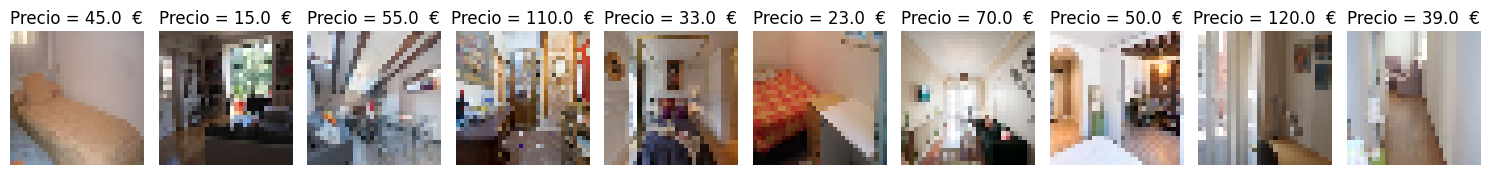

In [229]:
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
idx = np.random.randint(5, df_train_airbnb.shape[0]-5)
for i, ax in enumerate(axes):
    if i <  images_train_airbnb.shape[0]:
        ax.imshow( images_train_airbnb[idx])
        ax.set_title(f'Precio = {df_train_airbnb["Price"][idx]}  €')
        ax.axis('off')
        idx += 1
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

# 3. Preprocesado

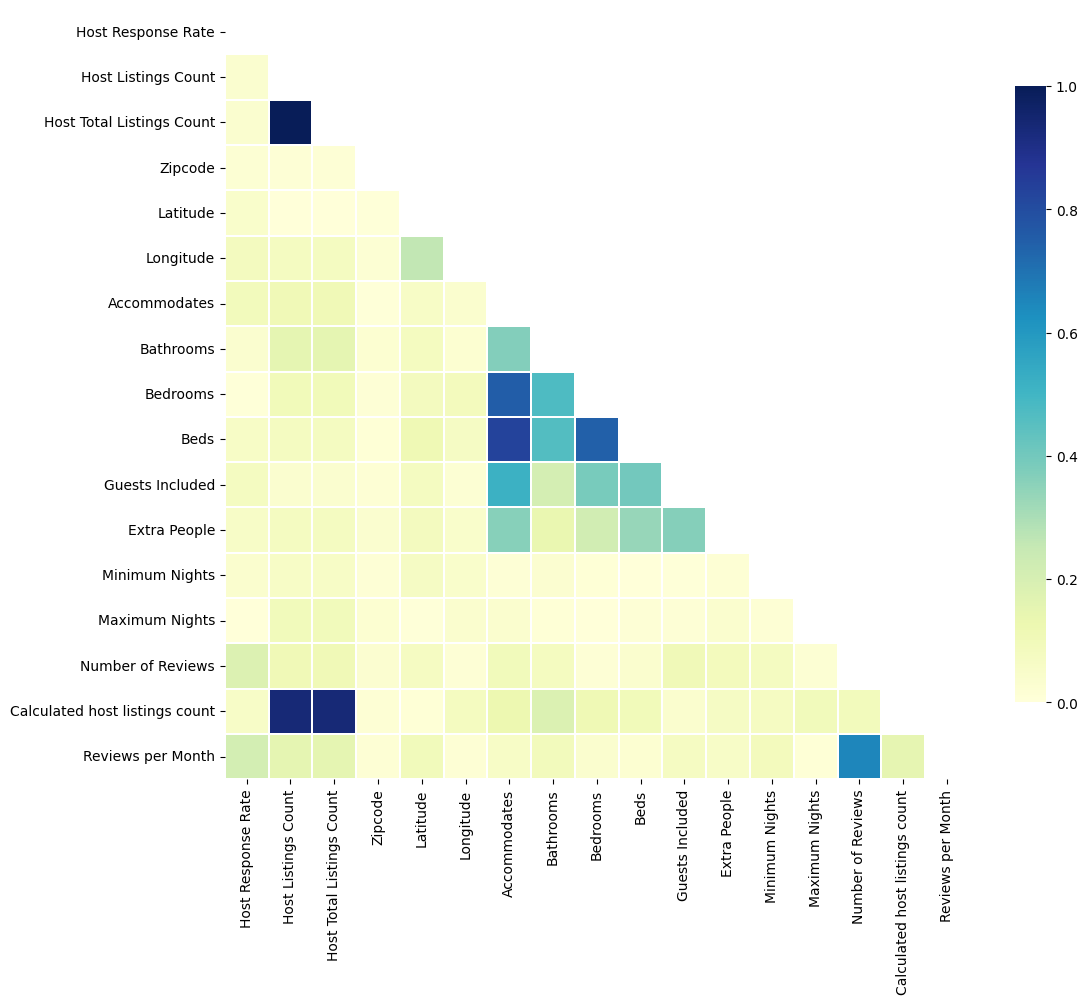

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = np.abs(df_train_airbnb.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)  # Corrección aquí

mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()


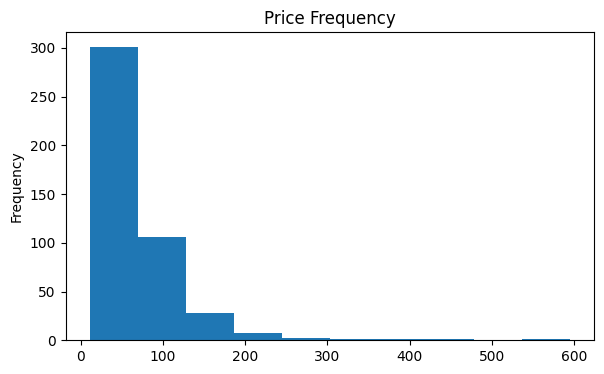

Como se puede corroborar ambas graficas confirman que la gran mayoría de los datos están distribuidos entre 20 a 100 euros. Esto nos permite definir un rango especifico análisis.


In [231]:
plt.figure(figsize=(15,4))
plt.subplot(1,2, 1)
df_train_airbnb['Price'].plot.hist(title='Price Frequency')
plt.show()
print("Como se puede corroborar ambas graficas confirman que la gran mayoría de los datos están distribuidos entre 20 a 100 euros. Esto nos permite definir un rango especifico análisis.")

<Axes: >

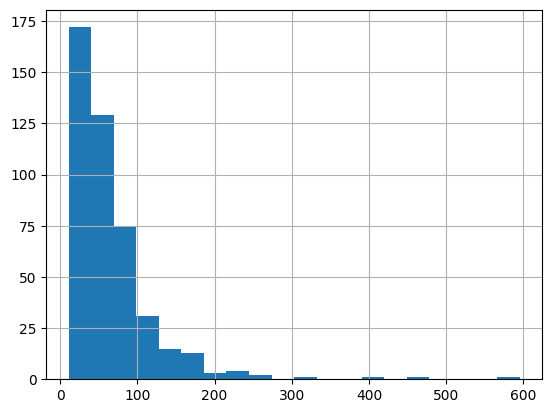

In [232]:
df_train_airbnb['Price'].hist(bins=20)

Property type

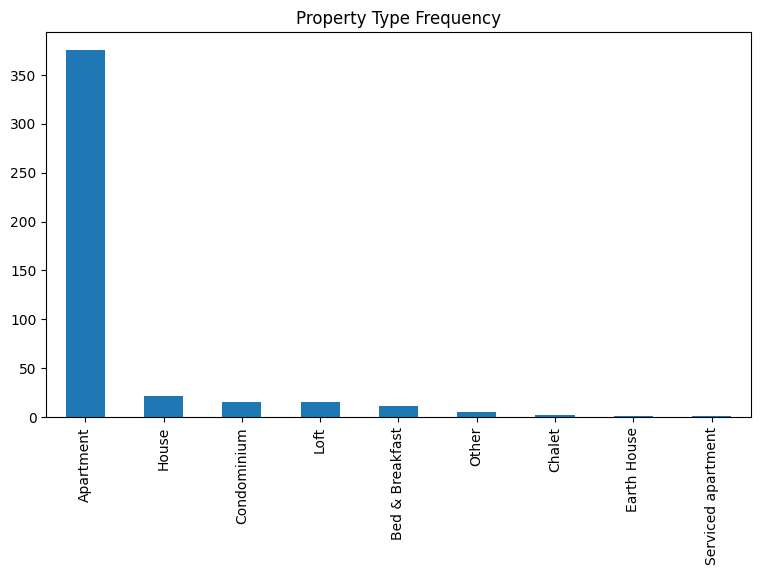

La gran mayoría de los inmuebles corresponden a apartamentos


In [233]:
plt.figure(figsize=(20,5))
plt.subplot(1,2, 1)
df_train_airbnb['Property Type'].value_counts().plot(kind='bar',title='Property Type Frequency')
plt.show()
print("La gran mayoría de los inmuebles corresponden a apartamentos")

Room Type

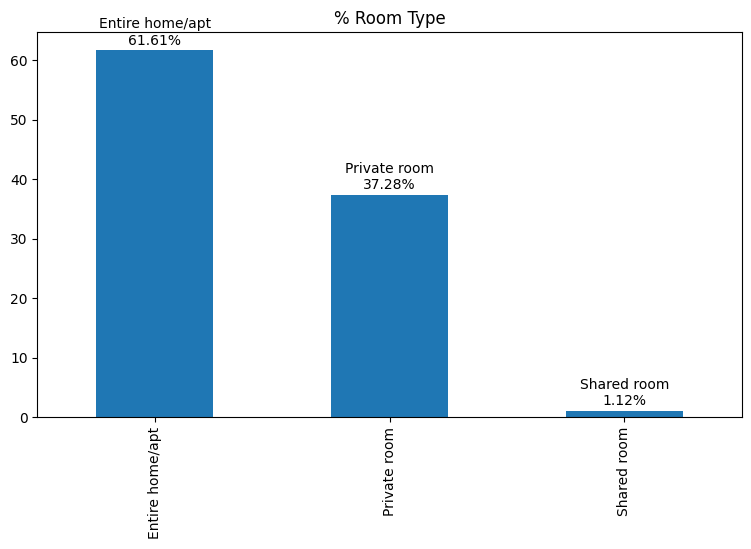

In [234]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
percentage_values = 100 * df_train_airbnb['Room Type'].value_counts() / len(df_train_airbnb['Room Type'])
counts = df_train_airbnb['Room Type'].value_counts()
bars = percentage_values.plot(kind='bar', title='% Room Type')
for i, value in enumerate(percentage_values):
    plt.text(i, value + 0.5, f'{counts.index[i]}\n{value:.2f}%', ha='center', va='bottom', fontsize=10)
plt.show()

Bed Type

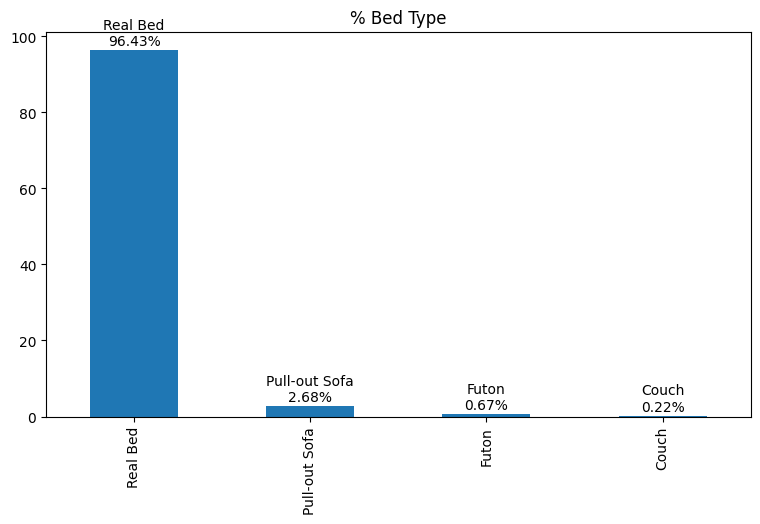

In [235]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
percentage_values = 100 * df_train_airbnb['Bed Type'].value_counts() / len(df_train_airbnb['Room Type'])
counts = df_train_airbnb['Bed Type'].value_counts()
bars = percentage_values.plot(kind='bar', title='% Bed Type')
for i, value in enumerate(percentage_values):
    plt.text(i, value + 0.5, f'{counts.index[i]}\n{value:.2f}%', ha='center', va='bottom', fontsize=10)
plt.show()


Cancellation Policy

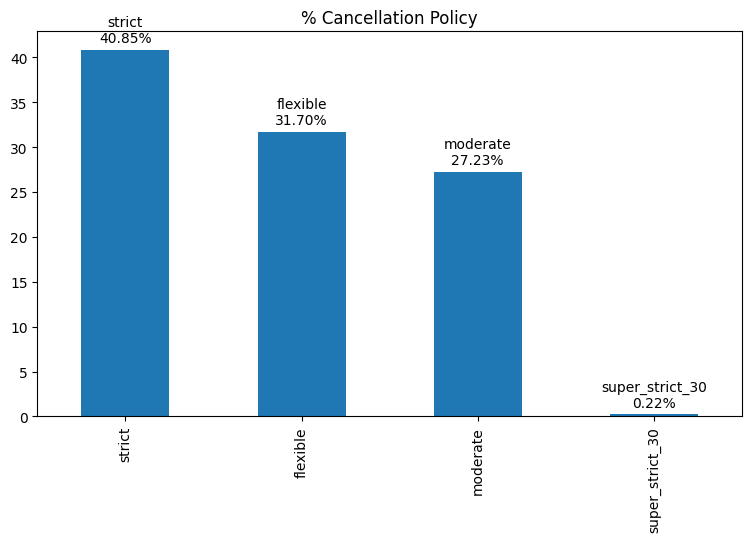

In [236]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
percentage_values = 100 * df_train_airbnb['Cancellation Policy'].value_counts() / len(df_train_airbnb['Cancellation Policy'])
counts = df_train_airbnb['Cancellation Policy'].value_counts()
bars = percentage_values.plot(kind='bar', title='% Cancellation Policy')
for i, value in enumerate(percentage_values):
    plt.text(i, value + 0.5, f'{counts.index[i]}\n{value:.2f}%', ha='center', va='bottom', fontsize=10)
plt.show()

Matriz de Alta Correlación.

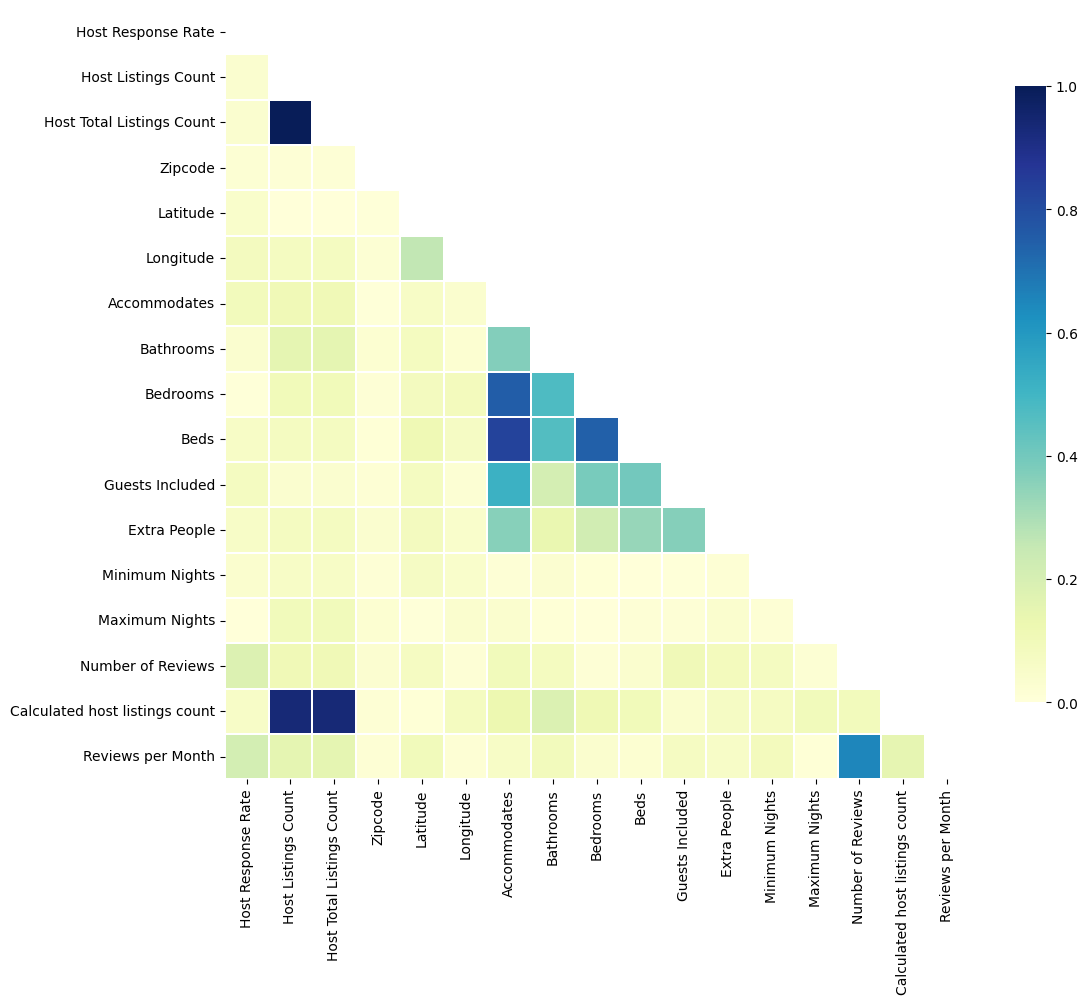

In [237]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define la función para obtener columnas numéricas
def obtener_columnas_numericas(df):
    return df.select_dtypes(include=[np.number]).columns.tolist()

# Compute the correlation matrix
corr = np.abs(df_train_airbnb[obtener_columnas_numericas(df_train_airbnb)].drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Dibuja el mapa de calor con la máscara y la proporción de aspecto correcta
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()


In [238]:
df_train_airbnb[list(df_train_airbnb.columns.values)].corr(numeric_only=True)

,Host Response Rate,Host Listings Count,Host Total Listings Count,Zipcode,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Calculated host listings count,Reviews per Month
Host Response Rate,1.000000,-0.033853,-0.033853,-0.022844,-0.043834,-0.085324,0.090673,-0.031824,-0.007811,0.058986,0.049969,0.074368,0.055961,0.038381,0.002241,0.181059,-0.055456,0.212881
Host Listings Count,-0.033853,1.000000,1.000000,0.013557,-0.002490,-0.077978,0.107899,0.153052,0.100375,0.076559,0.155287,0.031961,0.077505,0.061965,0.096450,-0.106551,0.936799,-0.155123
Host Total Listings Count,-0.033853,1.000000,1.000000,0.013557,-0.002490,-0.077978,0.107899,0.153052,0.100375,0.076559,0.155287,0.031961,0.077505,0.061965,0.096450,-0.106551,0.936799,-0.155123
Zipcode,-0.022844,0.013557,0.013557,1.000000,0.007671,0.021411,0.006579,0.025688,-0.012475,0.010372,-0.011912,0.016021,0.034837,0.015623,-0.025462,0.028038,0.016907,0.018161
Latitude,-0.043834,-0.002490,-0.002490,0.007671,1.000000,0.260654,0.061039,0.079834,0.084431,0.113827,0.059424,0.077517,0.083135,-0.067045,0.005384,-0.070467,0.009289,-0.095636
Longitude,-0.085324,-0.077978,-0.077978,0.021411,0.260654,1.000000,0.035432,-0.023836,0.088838,0.068913,-0.026598,-0.021926,0.045890,-0.044324,-0.036596,0.015529,-0.080697,0.017862
Accommodates,0.090673,0.107899,0.107899,0.006579,0.061039,0.035432,1.000000,0.370208,0.753167,0.828495,0.605799,0.517190,0.362464,-0.012420,0.036162,0.093937,0.126181,0.060894
Bathrooms,-0.031824,0.153052,0.153052,0.025688,0.079834,-0.023836,0.370208,1.000000,0.472715,0.464508,0.332964,0.207255,0.136619,0.030107,0.008399,-0.078914,0.185404,-0.090633
Bedrooms,-0.007811,0.100375,0.100375,-0.012475,0.084431,0.088838,0.753167,0.472715,1.000000,0.744204,0.541485,0.387849,0.215260,-0.008446,-0.003660,-0.013352,0.115971,-0.036268
Beds,0.058986,0.076559,0.076559,0.010372,0.113827,0.068913,0.828495,0.464508,0.744204,1.000000,0.472776,0.398970,0.332110,-0.003201,0.013220,0.035482,0.098477,0.024562



Para obtener una visión comprensiva de las relaciones entre las variables en cuestión, realizamos un scatter plot que muestre cada variable en comparación con las demás. No obstante, debido al considerable número de variables, la distinción entre ellas se vuelve complicada.
     

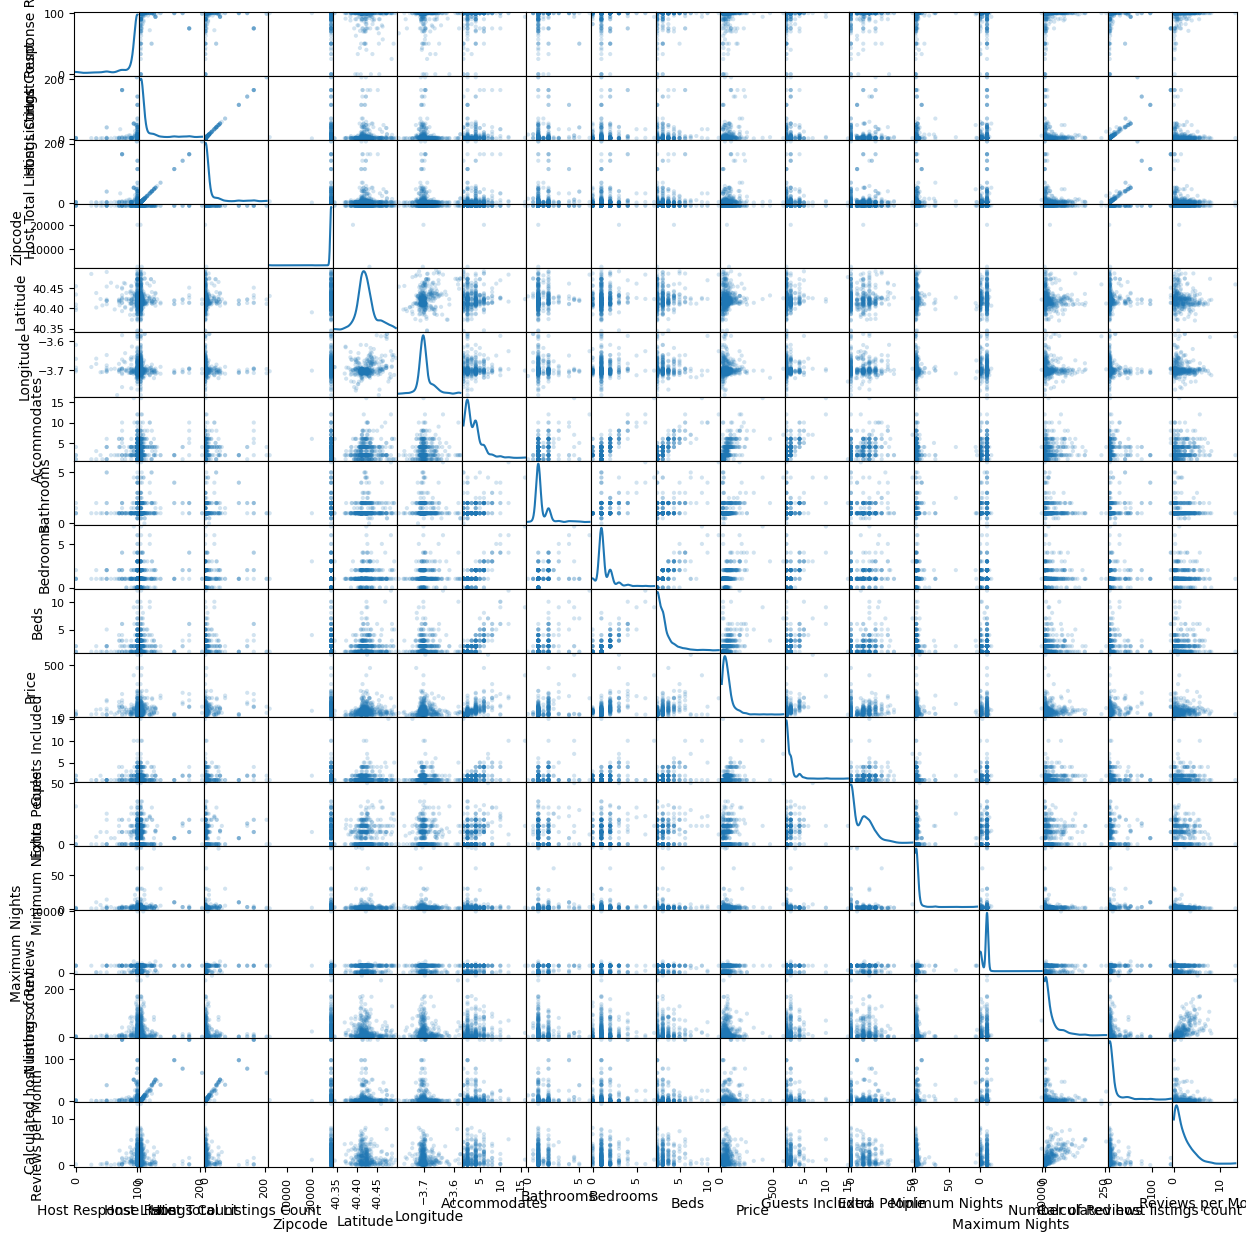

In [239]:
pd.plotting.scatter_matrix(df_train_airbnb, alpha=0.2, figsize=(15, 15), diagonal = 'kde')
plt.show()

# Resumen preprocesamiento

Calculo distancia haversine entre dos localizaciones

In [240]:
def haversine_distance(lat1, lon1, lat2, lon2):

	lon1 = np.radians(lon1)
	lat1 = np.radians(lat1)
	lon2 = np.radians(lon2)
	lat2 = np.radians(lat2)

	r = 6371

	dlon = np.subtract(lon2, lon1)
	dlat = np.subtract(lat2, lat1)

	a = np.add(np.power(np.sin(np.divide(dlat, 2)), 2),
               np.multiply(np.cos(lat1),
                           np.multiply(np.cos(lat2),
                                       np.power(np.sin(np.divide(dlon, 2)), 2))
                           )
              )
	c = np.multiply(2, np.arcsin(np.sqrt(a)))

	return c*r*1000

In [241]:
useful_data = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Summary', 'Space', 'Description',
                'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
                'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
                'Host Name', 'Host Location', 'Host Thumbnail Url', 'Host Picture Url',
                'Host Neighbourhood','City', 'Market', 'Country Code', 'Country', 'Has Availability',
                'License', 'Jurisdiction Names','Street','State','Name','Host About','First Review',
                'Last Review', 'Calendar last Scraped', 'Geolocation','Host Acceptance Rate',
                'Square Feet', 'Security Deposit', 'Amenities', 'Availability 30', 'Availability 60',
                'Availability 90', 'Availability 365','Review Scores Rating', 'Review Scores Accuracy',
                'Review Scores Cleanliness', 'Review Scores Checkin', 'Cleaning Fee', 'Host Acceptance Rate',
                'Review Scores Communication', 'Review Scores Location', 'Monthly Price',
                'Review Scores Value', 'Jurisdiction Names', 'Weekly Price','Host Response Time','Neighbourhood','Thumbnail Url'
            ]

In [242]:
df_train_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,398.0,94.618090,15.719194,0.000000,100.000000,100.000000,100.000000,100.000000
Host Listings Count,448.0,10.883929,28.067032,1.000000,1.000000,2.000000,6.000000,207.000000
Host Total Listings Count,448.0,10.883929,28.067032,1.000000,1.000000,2.000000,6.000000,207.000000
Zipcode,448.0,27942.595982,1246.924409,2815.000000,28006.000000,28012.000000,28020.000000,28055.000000
Latitude,448.0,40.422810,0.022137,40.344318,40.410691,40.420197,40.430978,40.494877
Longitude,448.0,-3.695949,0.025190,-3.784862,-3.707894,-3.700919,-3.693495,-3.577321
Accommodates,448.0,3.207589,2.016539,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,448.0,1.318080,0.724952,0.000000,1.000000,1.000000,1.125000,6.000000
Bedrooms,447.0,1.290828,0.886107,0.000000,1.000000,1.000000,2.000000,7.000000
Beds,448.0,1.975446,1.494756,1.000000,1.000000,2.000000,2.000000,12.000000


In [243]:
df_train_airbnb.shape

(448, 33)

In [244]:
def elimina_columnas(df, columnas):
    df = df.drop(columns=columnas, errors='ignore')
    return df


def prepoc_df(df, images_tot):
    # Longitud y Latitud centro Madrid para calcular la distancia haversine
    centro_madrid_lat = 40.41831
    centro_madrid_lon = -3.70275

    # Quitamos las columnas con su mayoría de variables a nulos
    df = elimina_columnas(df, useful_data)

    # Nos quedamos solo con los apartamentos
    df = df[df['Property Type'] == 'Apartment']  # Apartment

    # Room type diferente a shared
    df = df[df['Room Type'] != 'Shared room'] # Shared room

    # Bed type igual a Real bed
    df = df[df['Bed Type'] == 'Real Bed'] # Real Bed

    # Price entre 9 y 100 €
    df = df[(df['Price'] > 9) & (df['Price'] <= 100)]

    # Aplicamos distancia haversine para saber a qué distancia del centro están
    df = df.assign(centro =  lambda x: haversine_distance(x['Latitude'],x['Longitude'],centro_madrid_lat,centro_madrid_lon))

    # Eliminamos columnas las cuales hemos generado nuevas variables
    df = elimina_columnas(df, ['Longitude', 'Latitude'])

    # Se rellenan valores nulos con la media
    df.fillna(df.mean(), inplace=True)

    #Filtrar imagenes
    images_tot =  images_tot[df.index]

    return df, images_tot



In [245]:
#Cargamos los datos de test
test_airbnb_df  = pd.read_csv('test_airbnb.csv', sep=';', decimal='.')
images_test_airbnb  = np.load("test_images_airbnb.npy")

valid_airbnb_df  = pd.read_csv('valid_airbnb.csv', sep=';', decimal='.')
images_valid_airbnb  = np.load("valid_images_airbnb.npy")

In [246]:
df_train_prepoc,images_train_airbnb = prepoc_df(df_train_airbnb,images_train_airbnb)
df_test_prepoc,images_test_airbnb = prepoc_df(test_airbnb_df,images_test_airbnb)
df_valid_prepoc,images_valid_airbnb = prepoc_df(valid_airbnb_df,images_valid_airbnb)

In [247]:
print(f'Dimensiones del dataset de train después del preprocesamiento: {df_train_prepoc.shape}')
print(f'Dimensiones del dataset de test después del preprocesamiento: {df_test_prepoc.shape}')
print(f'Dimensiones del dataset de valid después del preprocesamiento: {df_valid_prepoc.shape}')

Dimensiones del dataset de train después del preprocesamiento: (308, 29)
Dimensiones del dataset de test después del preprocesamiento: (61, 29)
Dimensiones del dataset de valid después del preprocesamiento: (66, 29)


Proceso de validación

In [248]:
df_train_prepoc.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,308.0,95.151292,13.228978,0.000000,95.151292,100.000000,100.000000,100.000000
Host Listings Count,308.0,10.633117,27.669969,1.000000,1.000000,2.000000,5.000000,207.000000
Host Total Listings Count,308.0,10.633117,27.669969,1.000000,1.000000,2.000000,5.000000,207.000000
Zipcode,308.0,27908.909091,1503.373944,2815.000000,28006.000000,28012.000000,28020.000000,28053.000000
Accommodates,308.0,2.918831,1.607161,1.000000,2.000000,2.000000,4.000000,10.000000
Bathrooms,308.0,1.235390,0.624380,0.500000,1.000000,1.000000,1.000000,5.000000
Bedrooms,308.0,1.168831,0.683021,0.000000,1.000000,1.000000,1.000000,6.000000
Beds,308.0,1.759740,1.245475,1.000000,1.000000,1.000000,2.000000,10.000000
Price,308.0,50.925325,23.968851,12.000000,30.000000,50.000000,69.250000,100.000000
Guests Included,308.0,1.503247,1.131424,1.000000,1.000000,1.000000,2.000000,15.000000


In [249]:
df_train_prepoc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 447
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             308 non-null    object 
 1   Host Since                      308 non-null    object 
 2   Host Response Rate              308 non-null    float64
 3   Host Listings Count             308 non-null    float64
 4   Host Total Listings Count       308 non-null    float64
 5   Host Verifications              308 non-null    object 
 6   Neighbourhood Cleansed          308 non-null    object 
 7   Neighbourhood Group Cleansed    308 non-null    object 
 8   Zipcode                         308 non-null    int64  
 9   Smart Location                  308 non-null    object 
 10  Property Type                   308 non-null    object 
 11  Room Type                       308 non-null    object 
 12  Accommodates                    308 

In [250]:
df_train_prepoc.isna().sum()

Experiences Offered               0
Host Since                        0
Host Response Rate                0
Host Listings Count               0
Host Total Listings Count         0
Host Verifications                0
Neighbourhood Cleansed            0
Neighbourhood Group Cleansed      0
Zipcode                           0
Smart Location                    0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Price                             0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Calendar Updated                  0
Number of Reviews                 0
Cancellation Policy               0
Calculated host listings count    0
Reviews per Month                 0
Features                    

In [251]:
df_train_prepoc.isnull().any()

Experiences Offered               False
Host Since                        False
Host Response Rate                False
Host Listings Count               False
Host Total Listings Count         False
Host Verifications                False
Neighbourhood Cleansed            False
Neighbourhood Group Cleansed      False
Zipcode                           False
Smart Location                    False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Price                             False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar Updated                  False
Number of Reviews                 False
Cancellation Policy               False


In [252]:
#Aplicamos la media a valores nulos
df_train_prepoc[obtener_columnas_numericas(df_train_prepoc)] = df_train_prepoc[obtener_columnas_numericas(df_train_prepoc)].fillna(df_train_prepoc[obtener_columnas_numericas(df_train_prepoc)].mean())
df_test_prepoc[obtener_columnas_numericas(df_test_prepoc)] = df_test_prepoc[obtener_columnas_numericas(df_test_prepoc)].fillna(df_train_prepoc[obtener_columnas_numericas(df_test_prepoc)].mean())


#Creación X_train , y_train , X_test e y_test
features = df_train_prepoc[obtener_columnas_numericas(df_train_prepoc)].columns.drop(['Price'])
X_train = df_train_prepoc[features].values
y_train = df_train_prepoc['Price'].values
X_test  = df_test_prepoc[features].values
y_test  = df_test_prepoc['Price'].values
X_valid  = df_test_prepoc[features].values
y_valid  = df_test_prepoc['Price'].values


#Escalamos (con los datos de train)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(308, 16)
(308,)
(61, 16)
(61,)
(61, 16)
(61,)


In [253]:
# Convertiendo las etiquetas de clase en un formato de codificación one-hot.
y_train_cat =  to_categorical(y_train)
y_valid_cat =  to_categorical(y_valid)
y_test_cat  =  to_categorical(y_test)

# Modelado

El código define y entrena un modelo de red neuronal de perceptrón multicapa (MLP) utilizando TensorFlow/Keras. Este modelo tiene una arquitectura simple con una capa de entrada, dos capas ocultas y una capa de salida.

In [254]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]

modelMLP = Sequential()
modelMLP.add(Dense(8, input_dim=input_dim, activation="relu"))
modelMLP.add(Dense(4, activation="relu"))
modelMLP.add(Dense(1, activation="linear"))

epochs = 50
learning_rate = 0.01
decay= learning_rate / epochs
opt = tf.keras.optimizers.legacy.SGD(lr=learning_rate, decay=decay)
modelMLP.compile(loss="mean_squared_error", optimizer=opt)

print("[INFO] training model...")
history = modelMLP.fit(x=X_train, y=y_train_cat, shuffle=True, batch_size=32, epochs=epochs, validation_data=(X_valid, y_valid_cat), verbose=1)

# Evaluamos el modelo
loss = modelMLP.evaluate(X_test, y_test)

print("[INFO] scores...")
print(f'Loss={loss}')

print("[INFO] predicting house prices...")
preds = modelMLP.predict(X_test)
diff = preds.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)
print("[INFO] Imprimo error en porcentaje...")
print(absPercentDiff)


[INFO] training model...
Epoch 1/50
10/10 [==============================] - 1s 32ms/step - loss: 0.7237 - val_loss: 0.7268
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 0.2469 - val_loss: 0.4149
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 0.1542 - val_loss: 0.3026
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1167 - val_loss: 0.2453
Epoch 5/50
10/10 [==============================] - 0s 18ms/step - loss: 0.0963 - val_loss: 0.2096
Epoch 6/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0829 - val_loss: 0.1804
Epoch 7/50
10/10 [==============================] - 0s 22ms/step - loss: 0.0729 - val_loss: 0.1562
Epoch 8/50
10/10 [==============================] - 0s 32ms/step - loss: 0.0650 - val_loss: 0.1370
Epoch 9/50
10/10 [==============================] - 0s 26ms/step - loss: 0.0590 - val_loss: 0.1212
Epoch 10/50
10/10 [==============================] - 0s 24ms/step - loss: 0.0537 - val

El siguiente código compila un modelo de redes neuronales multicapa (MLP) utilizando la función de pérdida de entropía cruzada categórica, el optimizador Adam y mide la precisión como métrica. Luego, imprime un resumen del modelo, mostrando la arquitectura de las capas y el número de parámetros entrenables.

In [61]:
modelMLP.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
modelMLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


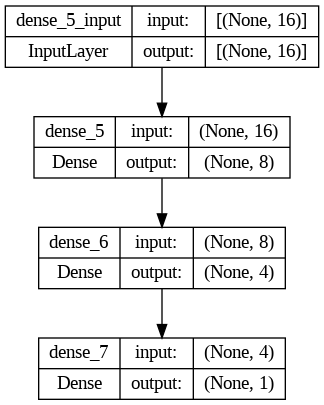

In [255]:
plot_model(modelMLP, show_shapes=True, show_layer_names=True)

El código muestra un gráfico de la pérdida (loss) del modelo a lo largo de las épocas tanto para el conjunto de entrenamiento como para el conjunto de prueba.

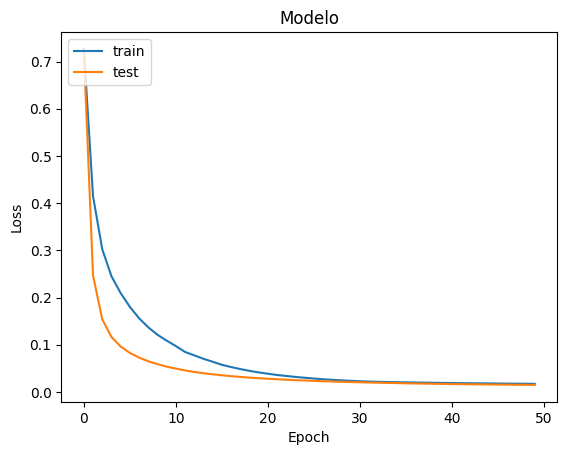

In [256]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Modelado Imagenes

Regresion con CNN

Este código define y entrena un modelo de red neuronal convolucional (CNN) utilizando TensorFlow y Keras. El modelo tiene tres capas convolucionales seguidas de capas de agrupación máxima (max pooling) y capas de abandono (dropout) para evitar el sobreajuste. Luego, hay una capa completamente conectada con activación ReLU y restricción de norma máxima (max_norm). Finalmente, hay una capa de salida con una neurona para la regresión lineal.

In [257]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.constraints import max_norm


# Asegurarse de que ambos conjuntos de datos tengan el mismo número de muestras
num_samples_x_train = images_train_airbnb.shape[0]
num_samples_y_train = y_train_cat.shape[0]
num_samples_x_valid = images_valid_airbnb.shape[0]
num_samples_y_valid = y_valid_cat.shape[0]

if num_samples_x_train != num_samples_y_train:
    min_samples = min(num_samples_x_train, num_samples_y_train)
    images_train_airbnb = images_train_airbnb[:min_samples]
    y_train_cat = y_train_cat[:min_samples]

if num_samples_x_valid != num_samples_y_valid:
    min_samples = min(num_samples_x_valid, num_samples_y_valid)
    images_valid_airbnb = images_valid_airbnb[:min_samples]
    y_valid_cat = y_valid_cat[:min_samples]


# Inicializamos el modelo
modelCNN = Sequential()

# Definimos una capa convolucional
modelCNN.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Dropout(0.25))

# Definimos una segunda capa convolucional
modelCNN.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Dropout(0.25))

# Definimos una tercera capa convolucional
modelCNN.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Dropout(0.25))

# Añadimos nuestra "salida" con 1 neurona para la regresión lineal
modelCNN.add(Flatten())
modelCNN.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
modelCNN.add(Dropout(0.5))
modelCNN.add(Dense(1, activation='linear'))  # Una sola neurona para la regresión lineal

# Compilamos el modelo
epochs = 50
learning_rate = 0.0001
opt = SGD(learning_rate=learning_rate)  # Corregido el argumento de learning_rate
modelCNN.compile(loss="mean_squared_error", optimizer=opt)

# Entrenamos el modelo
history = modelCNN.fit(x=images_train_airbnb, y=y_train_cat, batch_size=32, shuffle=True, validation_data=(images_valid_airbnb, y_valid_cat), epochs=epochs, verbose=1)

# Evaluamos el modelo
loss = modelCNN.evaluate(images_test_airbnb, y_test_cat)

Epoch 1/50
10/10 [==============================] - 4s 317ms/step - loss: 0.0382 - val_loss: 0.0117
Epoch 2/50
10/10 [==============================] - 2s 182ms/step - loss: 0.0373 - val_loss: 0.0115
Epoch 3/50
10/10 [==============================] - 2s 179ms/step - loss: 0.0416 - val_loss: 0.0114
Epoch 4/50
10/10 [==============================] - 2s 241ms/step - loss: 0.0390 - val_loss: 0.0113
Epoch 5/50
10/10 [==============================] - 3s 297ms/step - loss: 0.0368 - val_loss: 0.0112
Epoch 6/50
10/10 [==============================] - 2s 206ms/step - loss: 0.0386 - val_loss: 0.0111
Epoch 7/50
10/10 [==============================] - 2s 187ms/step - loss: 0.0400 - val_loss: 0.0110
Epoch 8/50
10/10 [==============================] - 2s 182ms/step - loss: 0.0394 - val_loss: 0.0110
Epoch 9/50
10/10 [==============================] - 2s 189ms/step - loss: 0.0384 - val_loss: 0.0109
Epoch 10/50
10/10 [==============================] - 2s 182ms/step - loss: 0.0391 - val_loss: 0.0108

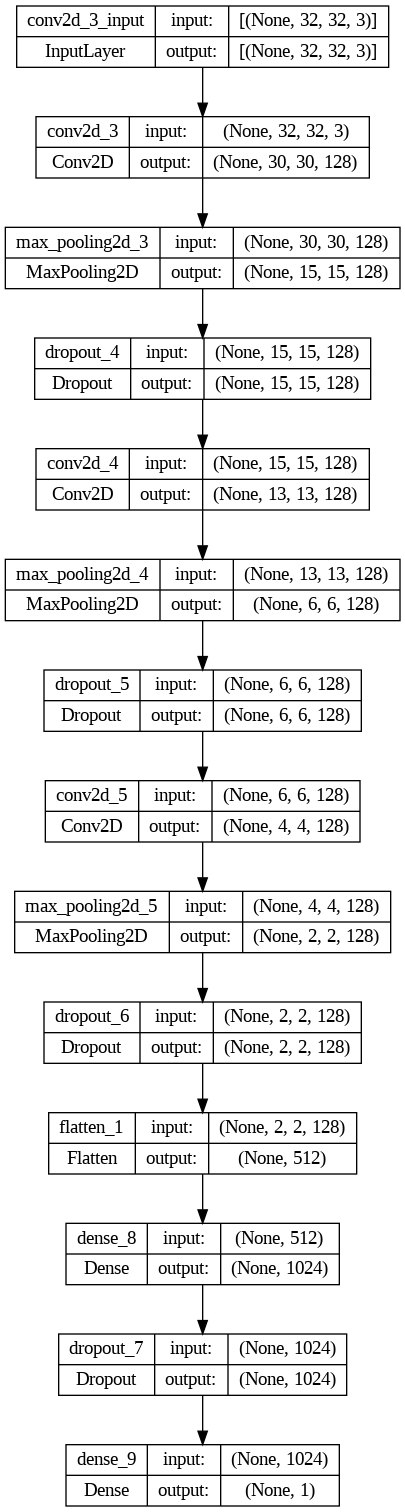

In [258]:
plot_model(modelCNN, show_shapes=True, show_layer_names=True)


El código proporcionado crea un gráfico que muestra la evolución de la pérdida (loss) del modelo a lo largo de las épocas durante el entrenamiento.

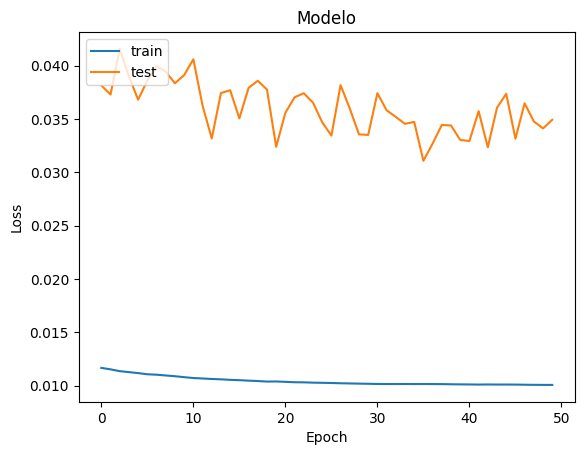

In [259]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Combinación datos tabulares e imágenes

El código primero combina las características de entrenamiento (X_train) y validación (X_valid) en un solo conjunto de datos denominado early_DT_train. Luego, obtiene la salida de la tercera capa desde el final de un modelo llamado modelCNN y crea un modelo llamado feature_extractor que toma las características de entrada y produce la salida de la tercera capa desde el final del modelo, brindando un resumen del modelo resultante.

In [260]:
early_DT_train = np.concatenate((X_train,X_valid), axis=0)
early_DT_train.shape

(369, 16)

In [261]:
last_layer = modelCNN.layers[-3].output
feature_extractor = Model(modelCNN.input, last_layer)
feature_extractor.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer  [(None, 32, 32, 3)]       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 128)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 128)         0   

Obtenemos así features para train, val  y test images

In [262]:
early_images_train = feature_extractor.predict(images_train_airbnb)
early_images_valid = feature_extractor.predict(images_valid_airbnb)
early_images_test  = feature_extractor.predict(images_test_airbnb)

print(early_images_train.shape)

2/2 [==============================] - 0s 125ms/step
(308, 1024)


# CONCLUSIÓN

Se pretendía realizar un análisis de los datos de manera individual para la data tabular y las imágenes, para luego fusionar los datos y validar cómo cambian en función de las técnicas de entrenamiento utilizadas. De la data tabular, se puede concluir que los modelos de entrenamiento y de test son congruentes y comparten un comportamiento similar, lo cual sería lo esperado. Sin embargo, al efectuar el mismo proceso con la data de imágenes, he tenido algunos inconvenientes que me hacen dudar de la fiabilidad del modelo. A pesar de que los datos de entrenamiento y test muestran la misma tendencia, el comportamiento de la curva de test me hace pensar que existen errores en la estructura del modelo. Desafortunadamente, no he logrado montar el modelo combinado de data tabular e imágenes para validar el comportamiento de la información.